# Grab AMSR

## PODAAC

https://podaac.jpl.nasa.gov/dataset/AMSR2-REMSS-L2P_RT-v8.2

## Usefull html links

https://www.remss.com/missions/amsr/

## Not as useful links

https://ghrsst-pp.metoffice.gov.uk/ostia-website/gmpe-monitoring.html

https://www.earthdata.nasa.gov/data/projects/lance

https://www.earthdata.nasa.gov/data/instruments/amsr2/near-real-time-data

https://www.earthdata.nasa.gov/data/instruments/amsr2

https://data.commerce.gov/ghrsst-noaa/ospo-level-2p-global-subskin-sea-surface-temperature-version-21-advanced-microwave-12

https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:GHRSST-EUR-L2P-AMSRE

https://www.earthdata.nasa.gov/data/instruments/amsr-e

https://www.earthdata.nasa.gov/data/instruments/amsr-e/data-access-tools

In [1]:
# imports
import os
import numpy as np
import numpy.ma as ma

from matplotlib import pyplot as plt
import cartopy.crs as ccrs

import xarray

In [2]:
%matplotlib ipympl

In [3]:
ex_file = os.path.join(os.getenv('OS_SST'), 'AMSR2',
                       '20250130163006-REMSS-L2P_GHRSST-SSTsubskin-AMSR2-L2B_rt_r67586-v02.0-fv01.0.nc')
ds = xarray.load_dataset(ex_file)

# Replace bad lat,lon with NaN

In [4]:
bad_lat = ds.lat.values < -100.
ds.lat.values[bad_lat] = np.nan

In [5]:
bad_lon = ds.lon.values < -1000.
ds.lon.values[bad_lon] = np.nan

# Plot

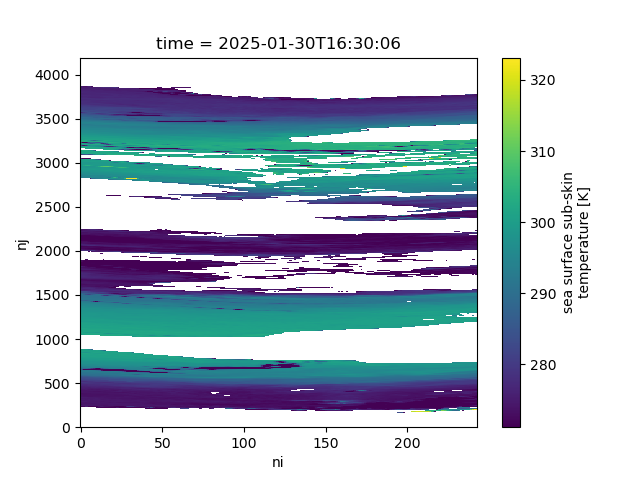

In [6]:
ds.sea_surface_temperature.plot()

----

In [8]:
sst_masked = ma.masked_invalid(ds['sea_surface_temperature'].values)
lat_masked = ma.masked_invalid(ds['lat'].values)
lon_masked = ma.masked_invalid(ds['lon'].values)

In [9]:
sst_masked.shape

(1, 4193, 243)

In [10]:
sst_plot = xarray.DataArray(
    sst_masked[0],
    coords={
        'lat': (('y', 'x'), ds.lat.values),
        'lon': (('y', 'x'), ds.lon.values)
    },
    dims=['y', 'x']
)

In [11]:
sst_plot.lat

<xarray.DataArray 'lat' (y: 4193, x: 243)> Size: 4MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    lat      (y, x) float32 4MB nan nan nan nan nan nan ... nan nan nan nan nan
    lon      (y, x) float32 4MB nan nan nan nan nan nan ... nan nan nan nan nan
Dimensions without coordinates: y, x

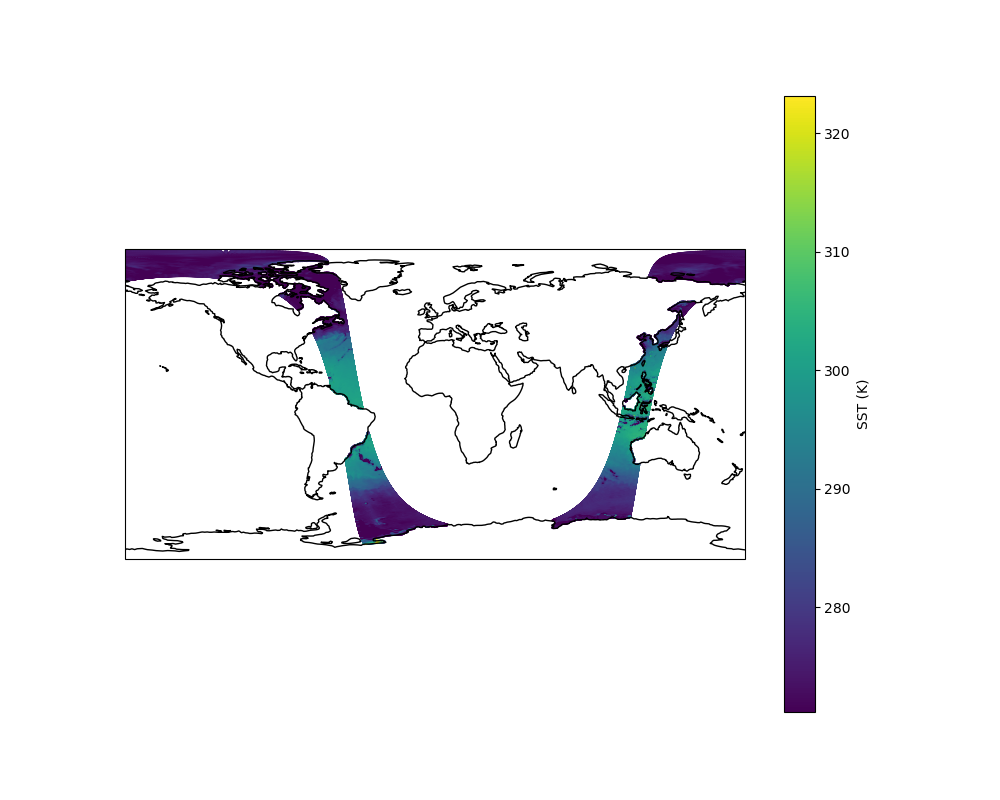

In [14]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

valid = np.isfinite(ds.lon.values)
plt.scatter(
    ds['lon'].values[valid],
    ds['lat'].values[valid],
    c=ds['sea_surface_temperature'][0].values[valid],
    s=1,  # point size
    cmap='viridis',
    transform=ccrs.PlateCarree()
)

ax.coastlines()
plt.colorbar(label='SST (K)')
plt.show()